We are going to:
1. Generate a random dataset of size 100 with 2 features (for easy plotting) and introduce some outliers.
2. Use the IsolationForest algorithm to detect outliers.
3. Plot the data, highlighting the outliers and inliers.
    
Steps for data generation:
- Generate 95 inliers from a multivariate normal distribution (mean [0,0], covariance matrix [[1, 0.5], [0.5, 1]]).
- Generate 5 outliers from a uniform distribution in a range that is far from the inliers (e.g., between 5 and 10 in both features).
    
Then, we'll:
- Fit an IsolationForest model. Initialize the model with contamination=0.05 (expected outlier proportion).
- Predict the outliers (the model returns -1 for outliers and 1 for inliers).
- Plot the data with different colors for inliers and outliers. Plot inliers in blue and outliers in red.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
# Generate dataset
np.random.seed(42)
inliers = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=95)
outliers = np.random.uniform(low=5, high=10, size=(5, 2))
data = np.vstack([inliers, outliers])

In [4]:
# Detect outliers with Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = model.fit_predict(data)

In [5]:
# Separate inliers and outliers
inlier_points = data[outlier_labels == 1]
outlier_points = data[outlier_labels == -1]

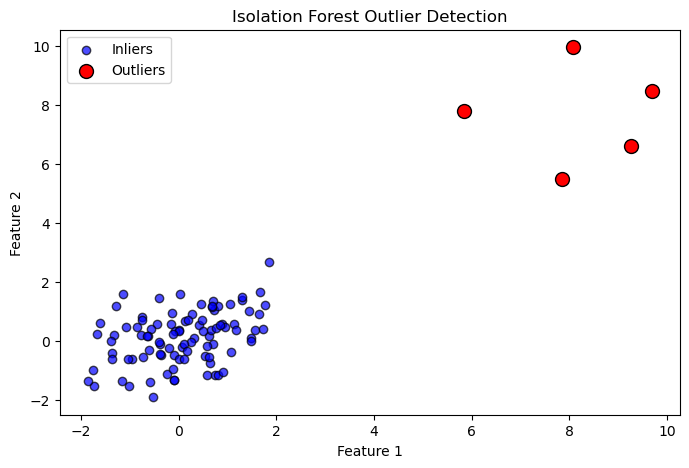

In [11]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(inlier_points[:, 0], inlier_points[:, 1], color='blue', label='Inliers', edgecolor='k', alpha=0.7)
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', label='Outliers', s=100, edgecolor='k')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(False)
plt.show()

<h3 style='color:black;'>Explanation:</h3>

Data Generation: The dataset combines 95 normally distributed points (inliers) with 5 uniformly distributed points (outliers) positioned far from the main cluster.

Isolation Forest: This algorithm isolates observations by randomly selecting features/split values. Outliers require fewer splits to isolate, identified by shorter path lengths.

Visualization: Inliers (blue) cluster near the origin, while outliers (red) appear in the top-right corner, clearly separated.

<h3 style='color:black;'>Output:</h3>

The plot will show:

A dense cluster of blue points (inliers) around (0, 0).

5 red points (outliers) scattered between (5, 5) and (10, 10).

Labels, grid, and legend for interpretation.

This approach efficiently demonstrates outlier detection using Isolation Forest on synthetic data.

<h3 style='color:black;'>Explanation of contamination=0.05 in Isolation Forest</h3>

The contamination parameter in Isolation Forest specifies the expected proportion of outliers in the dataset. Setting contamination=0.05 means the model assumes 5% of the data points are outliers.

Key Points:

Default Value: If not specified, the default is contamination='auto', which sets it to 0.1 (10%).

Impact on Model:

A higher contamination (e.g., 0.1) makes the model more aggressive in flagging outliers.

A lower contamination (e.g., 0.01) makes the model more conservative.

Why 0.05 in this case?

We generated 100 points, with 5 outliers (5%).

Hence, contamination=0.05 aligns with the true outlier rate.

<h3 style='color:black;'>How It Works in Code:</h3>

In [ ]:
model = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = model.fit_predict(data)

The model adjusts its threshold to classify ~5% of points as outliers (-1).

The rest are considered inliers (1).

<h3 style='color:black;'>Best Practices:</h3>

If the true outlier rate is unknown, use:

In [ ]:
model = IsolationForest(contamination='auto')  # Default: 0.1

For datasets where outliers are rare, set a lower value (e.g., 0.01).

Use domain knowledge or grid search to tune contamination.

<h3 style='color:black;'>Conclusion</h3>

contamination=0.05 works well here because we know the true outlier rate (5%).

In real-world scenarios, you may need to tune this parameter using cross-validation or domain knowledge.